In [1]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
# import seaborn as sns
import calmap as cm

# from nba_utils import draw_3pt_piechart,plot_shot_chart

from IPython.core.display import display, HTML
from IPython.core.magic import register_cell_magic, register_line_cell_magic, register_line_magic
from matplotlib import pyplot as plt
# from matplotlib import cm as cm
from matplotlib import colorbar as cbar
from matplotlib import cbook as cbook
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import array, col, count, mean, sum, udf, when
from pyspark.sql.types import DoubleType, IntegerType, StringType, Row
from pyspark.sql.functions import sum, col, udf
from pyspark.sql.functions import year, month, dayofmonth, hour, minute
from pyspark.sql.types import *

import warnings
warnings.filterwarnings("ignore")

# sns.set_style("white")
# sns.set_color_codes()

In [2]:
weatherDF = spark.read.csv('s3a://davidsx/weather.csv', header=True)
weatherDF = weatherDF.select(
#  'STATION',
 'DATE',
 'REPORT_TYPE2',
#  'CDSD',
#  'CLDD',
#  'DSNW',
 'DailyAverageDryBulbTemperature',
 'DailyCoolingDegreeDays',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyHeatingDegreeDays',
 'DailyMaximumDryBulbTemperature',
 'DailyMinimumDryBulbTemperature',
 'DailyPrecipitation',
#  'HDSD',
#  'HTDD',
 'MonthlyDaysWithGT001Precip',
 'MonthlyDaysWithGT010Precip',
 'MonthlyDaysWithGT32Temp',
 'MonthlyDaysWithGT90Temp',
 'MonthlyDaysWithLT0Temp',
 'MonthlyDaysWithLT32Temp',
 'MonthlyDepartureFromNormalAverageTemperature',
 'MonthlyDepartureFromNormalCoolingDegreeDays',
 'MonthlyDepartureFromNormalHeatingDegreeDays',
 'MonthlyDepartureFromNormalMaximumTemperature',
 'MonthlyDepartureFromNormalMinimumTemperature',
 'MonthlyDepartureFromNormalPrecipitation',
 'MonthlyDewpointTemperature',
 'MonthlyGreatestPrecip',
 'MonthlyGreatestPrecipDate',
 'MonthlyMaximumTemperature',
 'MonthlyMeanTemperature',
 'MonthlyMinimumTemperature',

 'NormalsCoolingDegreeDay',
 'NormalsHeatingDegreeDay'
)

In [4]:
from pyspark.sql.functions import to_timestamp, concat_ws, regexp_replace

weatherDF = weatherDF.withColumn('Datetime_str',regexp_replace(col("DATE"), "T", " "))\
.withColumn('Datetime',to_timestamp('DateTime_str', 'yyyy-MM-dd HH:mm:ss').cast(TimestampType()))\


weatherDF = weatherDF.withColumn("Year", year("Datetime")).withColumn("Month", month("Datetime"))\
.withColumn("DayOfMonth",dayofmonth("Datetime")).withColumn("Hour", hour("Datetime"))\
.withColumn("Minute", minute("Datetime"))

weatherDF = weatherDF.withColumn("Type",col("REPORT_TYPE2"))

weatherDF = weatherDF.drop('DATE','Datetime_str','REPORT_TYPE2')
# weatherDF.select('DATE').show()

In [5]:
wmDF = weatherDF.where(col('REPORT_TYPE2').like('SOM%'))
wmDF = wmDF.select(  \
 'Type',
 'Datetime',
 'Year',
 'Month',
 'DayOfMonth',
 'Hour',
 'Minute',
 'MonthlyDaysWithGT001Precip',
 'MonthlyDaysWithGT010Precip',
 'MonthlyDaysWithGT32Temp',
 'MonthlyDaysWithGT90Temp',
 'MonthlyDaysWithLT0Temp',
 'MonthlyDaysWithLT32Temp',
 'MonthlyDepartureFromNormalAverageTemperature',
 'MonthlyDepartureFromNormalCoolingDegreeDays',
 'MonthlyDepartureFromNormalHeatingDegreeDays',
 'MonthlyDepartureFromNormalMaximumTemperature',
 'MonthlyDepartureFromNormalMinimumTemperature',
 'MonthlyDepartureFromNormalPrecipitation',
 'MonthlyDewpointTemperature',
 'MonthlyGreatestPrecip',
 'MonthlyGreatestPrecipDate',
 'MonthlyMaximumTemperature',
 'MonthlyMeanTemperature',
 'MonthlyMinimumTemperature')

In [7]:
wdDF = weatherDF.where(col('REPORT_TYPE2').like('SOD%'))
wdDF = wdDF.select(  \
 'Type',
 'Datetime',
 'Year',
 'Month',
 'DayOfMonth',
 'Hour',
 'Minute',
 'DailyAverageDryBulbTemperature',
 'DailyCoolingDegreeDays',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyHeatingDegreeDays',
 'DailyMaximumDryBulbTemperature',
 'DailyMinimumDryBulbTemperature',
 'DailyPrecipitation').where(col('Year')!=2019)

In [26]:
weatherDF.groupBy('Type').count().show()

+-----+-----+
| Type|count|
+-----+-----+
|FM-15| 5142|
|SOM  |  110|
|SOD  | 3345|
+-----+-----+



In [34]:
wdDF.groupBy('Month','DayOfMonth').count().orderBy('Month','DayOfMonth').show(n=366)

+-----+----------+-----+
|Month|DayOfMonth|count|
+-----+----------+-----+
|    1|         1|    9|
|    1|         2|    9|
|    1|         3|    9|
|    1|         4|    9|
|    1|         5|    9|
|    1|         6|    9|
|    1|         7|    9|
|    1|         8|    9|
|    1|         9|    9|
|    1|        10|    9|
|    1|        11|    9|
|    1|        12|    9|
|    1|        13|    9|
|    1|        14|    9|
|    1|        15|    9|
|    1|        16|    9|
|    1|        17|    9|
|    1|        18|    9|
|    1|        19|    9|
|    1|        20|    9|
|    1|        21|    9|
|    1|        22|    9|
|    1|        23|    9|
|    1|        24|    9|
|    1|        25|    9|
|    1|        26|    9|
|    1|        27|    9|
|    1|        28|    9|
|    1|        29|    9|
|    1|        30|    9|
|    1|        31|    9|
|    2|         1|    9|
|    2|         2|    9|
|    2|         3|    9|
|    2|         4|    9|
|    2|         5|    9|
|    2|         6|    9|


In [37]:
wdDF.printSchema()

root
 |-- Type: string (nullable = true)
 |-- Datetime: timestamp (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayOfMonth: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- Minute: integer (nullable = true)
 |-- DailyAverageDryBulbTemperature: string (nullable = true)
 |-- DailyCoolingDegreeDays: string (nullable = true)
 |-- DailyDepartureFromNormalAverageTemperature: string (nullable = true)
 |-- DailyHeatingDegreeDays: string (nullable = true)
 |-- DailyMaximumDryBulbTemperature: string (nullable = true)
 |-- DailyMinimumDryBulbTemperature: string (nullable = true)
 |-- DailyPrecipitation: string (nullable = true)



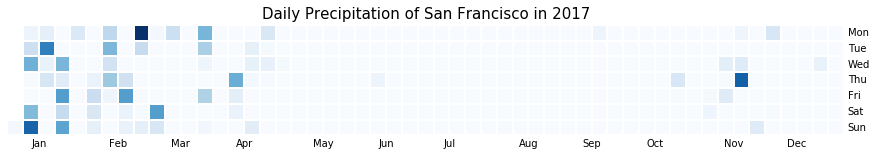

In [55]:
wdDF_2017 = wdDF.where(col('Year')==2017)
daysOf2017 = pd.date_range('1/1/2017',periods=365, freq='D')
rainy_days = wdDF_2017.select('DailyPrecipitation').rdd.map(lambda x: x[0]).collect()
rain_series = pd.Series(rainy_days, index=daysOf2017, dtype=float)

fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.set_title('Daily Precipitation of San Francisco in 2017', size=15)
cm.yearplot(rain_series, ax=ax ,year=2017, cmap='Blues')

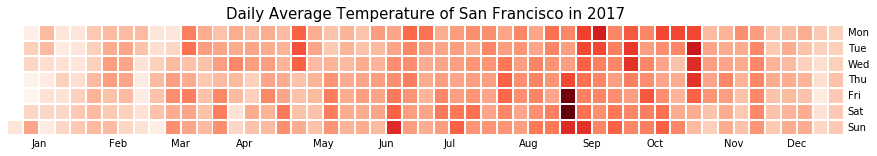

In [56]:
wdDF_2017 = wdDF.where(col('Year')==2017)
daysOf2017 = pd.date_range('1/1/2017',periods=365, freq='D')
temp_days = wdDF_2017.select('DailyAverageDryBulbTemperature').rdd.map(lambda x: x[0]).collect()
temp_series = pd.Series(temp_days, index=daysOf2017, dtype=float)

fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.set_title('Daily Average Temperature of San Francisco in 2017', size=15)
cm.yearplot(temp_series, ax=ax ,year=2017)

In [50]:
temp_series

2017-01-01    49.0
2017-01-02    47.0
2017-01-03    53.0
2017-01-04    52.0
2017-01-05    46.0
2017-01-06    45.0
2017-01-07    52.0
2017-01-08    59.0
2017-01-09    56.0
2017-01-10    56.0
2017-01-11    51.0
2017-01-12    48.0
2017-01-13    50.0
2017-01-14    52.0
2017-01-15    48.0
2017-01-16    49.0
2017-01-17    48.0
2017-01-18    50.0
2017-01-19    53.0
2017-01-20    50.0
2017-01-21    52.0
2017-01-22    52.0
2017-01-23    49.0
2017-01-24    49.0
2017-01-25    49.0
2017-01-26    51.0
2017-01-27    53.0
2017-01-28    54.0
2017-01-29    54.0
2017-01-30    54.0
              ... 
2017-12-02    55.0
2017-12-03    54.0
2017-12-04    56.0
2017-12-05    58.0
2017-12-06    56.0
2017-12-07    58.0
2017-12-08    56.0
2017-12-09    57.0
2017-12-10    58.0
2017-12-11    58.0
2017-12-12    55.0
2017-12-13    53.0
2017-12-14    57.0
2017-12-15    55.0
2017-12-16    58.0
2017-12-17    58.0
2017-12-18    54.0
2017-12-19    53.0
2017-12-20    51.0
2017-12-21    51.0
2017-12-22    48.0
2017-12-23  